In [1]:
import sys
sys.path

['d:\\Desktop\\QBM_project_repo\\quMCMC\\final_results_notebooks',
 'd:\\anaconda_neel\\python38.zip',
 'd:\\anaconda_neel\\DLLs',
 'd:\\anaconda_neel\\lib',
 'd:\\anaconda_neel',
 '',
 'd:\\anaconda_neel\\lib\\site-packages',
 'd:\\anaconda_neel\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'd:\\anaconda_neel\\lib\\site-packages\\win32',
 'd:\\anaconda_neel\\lib\\site-packages\\win32\\lib',
 'd:\\anaconda_neel\\lib\\site-packages\\Pythonwin',
 'd:\\anaconda_neel\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\NEELKANTH RAWAT\\.ipython']

In [2]:
sys.path.append("d:/Desktop/QBM_project_repo/quMCMC")

In [3]:
import qumcmc

In [4]:
## import essential modules 
from qumcmc.basic_utils import *
from qumcmc.energy_models import IsingEnergyFunction, Exact_Sampling

from qumcmc.classical_mcmc_routines import classical_mcmc
from qumcmc.quantum_mcmc_routines_qulacs import quantum_enhanced_mcmc     #for Qulacs Simulator backend (** Faster )
from qumcmc.quantum_mcmc_qulacs_2 import quantum_enhanced_mcmc_2
# from qumcmc.quantum_mcmc_routines_qiskit import quantum_enhanced_mcmc   #for qiskit Aer's Simulator backend 

from qumcmc.trajectory_processing import calculate_running_js_divergence, calculate_running_kl_divergence, calculate_runnning_magnetisation, get_trajectory_statistics
from qumcmc.prob_dist import DiscreteProbabilityDistribution

In [5]:
### BAS dataset
gridsize=3

bas= bas_dataset(grid_size=gridsize)
bas.dataset.sort()

     MODEL : mismatched 9X9 bars only |  beta : 1.5
Num Most Probable States : 2
Entropy : 1.0000000002482718
---------------------------------------------


{'000000111': 0.4999999997195905,
 '111111000': 0.4999999997195905,
 '000111111': 2.804053086745677e-10,
 '111000000': 2.804053086745677e-10,
 '000010111': 4.001220279379877e-15,
 '111101000': 4.001220279379877e-15,
 '000111000': 2.1547748714157753e-16,
 '111000111': 2.1547748714157753e-16,
 '010000111': 4.155354877430804e-18,
 '101111000': 4.155354877430804e-18,
 '000110111': 3.886722303568911e-19,
 '111001000': 3.886722303568911e-19,
 '000011111': 2.2001752985339133e-21,
 '111100000': 2.2001752985339133e-21,
 '000111011': 3.242968563739129e-22,
 '111000100': 3.242968563739129e-22,
 '011111000': 1.7160055558449115e-22,
 '100000111': 1.7160055558449115e-22,
 '000100111': 1.4421959339571155e-22,
 '111011000': 1.4421959339571155e-22,
 '000111001': 5.486334120902453e-23,
 '111000110': 5.486334120902453e-23,
 '000111110': 1.8971379453015097e-23,
 '111000001': 1.8971379453015097e-23,
 '011000111': 1.98325952259175e-24,
 '100111000': 1.98325952259175e-24,
 '000001111': 6.623499210559058e-25,

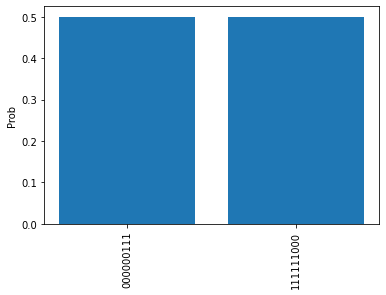

In [44]:
# consider only the bars dataset and create the weight matrix for them and create the ising model
wt = hebbing_learning(bas.bas_dict["bars"])
n_spins=gridsize*gridsize
shape_of_J=(n_spins,n_spins)
J=-1*wt

### for mismached hamiltonian
# Set the random seed for reproducibility
np.random.seed(45)
J_miss = J + np.random.randn(*J.shape)*2
h=np.zeros(n_spins)
model_miss = IsingEnergyFunction(J_miss, h, name= f'mismatched {n_spins}X{n_spins} bars only')


# model.model_summary()
beta=1.5
## run exact sampling over all possible configurations 
exact_sampled_model = Exact_Sampling(model_miss, beta)

## get distribution from the model
bpd= DiscreteProbabilityDistribution(exact_sampled_model.boltzmann_pd)
exact_sampled_model.sampling_summary()

bpd ### this seems like a 

In [ ]:
### some which worked well
#1. only 1 random mismatching
#2. 

{'000111111': 0.4997516166429371,
 '111000000': 0.4997516166429371,
 '000000111': 0.00024737266770281935,
 '111111000': 0.00024737266770281935,
 '000111000': 1.0106893351264176e-06,
 '111000111': 1.0106893351264176e-06,
 '000111101': 9.755737716142394e-15,
 '111000010': 9.755737716142394e-15,
 '000010111': 9.57401036471014e-15,
 '111101000': 9.57401036471014e-15,
 '000110111': 5.4641045512994596e-15,
 '111001000': 5.4641045512994596e-15,
 '000011111': 1.2999843685985479e-16,
 '111100000': 1.2999843685985479e-16,
 '000111011': 4.012613862501211e-17,
 '111000100': 4.012613862501211e-17,
 '000111100': 1.5427564293000352e-17,
 '111000011': 1.5427564293000352e-17,
 '000111001': 2.9965810559953072e-18,
 '111000110': 2.9965810559953072e-18,
 '000101111': 2.190724517352391e-18,
 '111010000': 2.190724517352391e-18,
 '000100111': 1.818396004159074e-18,
 '111011000': 1.818396004159074e-18,
 '000111110': 1.3440567679024815e-19,
 '111000001': 1.3440567679024815e-19,
 '001111000': 7.041231605256953e